# Анализ системы метрик приложения

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [62]:
# Используйте ячейки типа Code для вашего кода, а ячейки типа Markdown для комментариев и выводов

In [63]:
# При необходимости добавьте новые ячейки для кода или текстового блока

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [65]:
df_visit=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
df_order=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
df_cost=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

In [66]:
df_visit.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [67]:
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


In [68]:
df_order.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [69]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


In [70]:
df_cost.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [71]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


In [72]:
display(df_cost.channel.unique())

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

In [73]:
display(df_visit.region.unique())

array(['India'], dtype=object)

In [74]:
display(df_visit.channel.unique())

array(['MediaTornado', 'RocketSuperAds', 'FaceBoom', 'TipTop'],
      dtype=object)

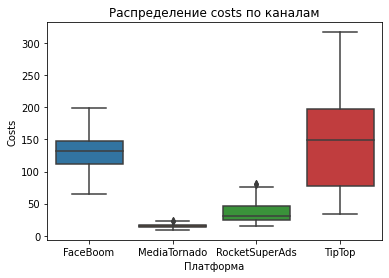

In [75]:
sns.boxplot(x='channel',           # категория по оси X
            y='costs',
            data=df_cost.query("channel in ['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop']"),
            order=['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение costs по каналам')
plt.xlabel('Платформа')
plt.ylabel('Costs')
plt.show()

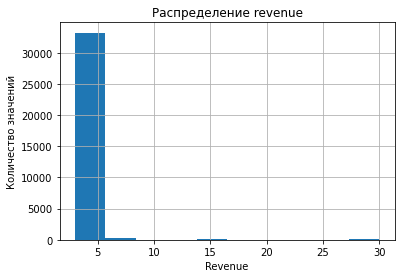

In [76]:
df_order.revenue.hist()
plt.title('Распределение revenue')
plt.xlabel('Revenue')
plt.ylabel('Количество значений')
plt.show()

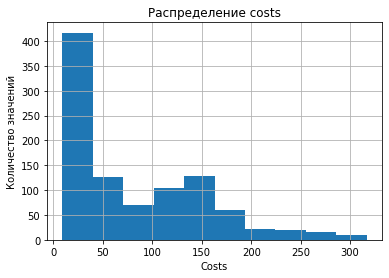

In [77]:
df_cost.costs.hist()
plt.title('Распределение costs')
plt.xlabel('Costs')
plt.ylabel('Количество значений')
plt.show()

## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [78]:
first_sessions = df_visit.sort_values(by=['user_id', 'session_start']).drop_duplicates('user_id')
profiles = first_sessions[['user_id', 'session_start', 'channel']].rename(
    columns={'session_start': 'first_dt', 'channel': 'first_channel'}
)

In [79]:
# Приводим first_dt к типу date для корректного объединения
profiles['first_dt'] = profiles['first_dt'].astype('datetime64[ns]').dt.date

In [80]:
#количество пользователей на канал
users_per_channel_day = profiles.groupby(['first_dt', 'first_channel']) \
    .agg(users_count=('user_id', 'nunique')) \
    .reset_index()

In [81]:
df_cost['dt'] = df_cost['dt'].astype('datetime64[ns]').dt.date  # Приводим к date

# 4. Добавим расходы по дате и каналу
cac_df = users_per_channel_day.merge(
    df_cost[['dt', 'channel', 'costs']],
    left_on=['first_dt', 'first_channel'],
    right_on=['dt', 'channel'],
    how='left'
)

In [82]:
# Вычисляем CAC c обработкой ошибок
cac_df['cac'] = cac_df['costs'] / cac_df['users_count']

# В случаи пропусков, заполним их 0 
cac_df['cac'] = cac_df['cac'].fillna(0)

# Присоединяем CAC обратно к профилям
profiles = profiles.merge(cac_df[['first_dt', 'first_channel', 'cac']], on=['first_dt', 'first_channel'], how='left')

# Конечный результат profiles
profiles = profiles[['user_id', 'first_dt', 'first_channel', 'cac']]

profiles.head()

,user_id,first_dt,first_channel,cac
0,26034876,2024-05-29,FaceBoom,0.953250
1,69890364,2024-06-28,RocketSuperAds,0.604917
2,75610104,2024-06-09,FaceBoom,1.196159
3,76692397,2024-10-21,FaceBoom,1.147967
4,80224421,2024-06-21,FaceBoom,1.208981


In [83]:
#Добавим к исходным данным profiles
df_order = df_order.merge(profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')

df_visit = df_visit.merge(profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')

In [84]:
#Вычисляем lifetime
df_order['lifetime'] = (df_order['event_dt'].astype('datetime64[ns]').dt.date - df_order['first_dt'].astype('datetime64[ns]').dt.date).dt.days
df_visit['lifetime'] = (df_visit['session_start'].astype('datetime64[ns]').dt.date - df_visit['first_dt'].astype('datetime64[ns]').dt.date).dt.days

df_order.head()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01,FaceBoom,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01,FaceBoom,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01,FaceBoom,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01,TipTop,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01,FaceBoom,0


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

In [85]:
df_visit['session_start'] = pd.to_datetime(df_visit['session_start'])
# Извлекаем дату
df_visit['session_date'] = df_visit['session_start'].dt.floor('D')

dau_app = df_visit.groupby('session_date')['user_id'].nunique().reset_index()

dau_app['month'] = dau_app['session_date'].dt.to_period('M').dt.to_timestamp()
df_visit['month'] = df_visit['session_date'].dt.to_period('M').dt.to_timestamp()
dau_monthly_average_app = dau_app.groupby('month')['user_id'].mean().reset_index()

mau_app = df_visit.groupby('month')['user_id'].nunique().reset_index()

stickiness_table_app = pd.merge(mau_app, dau_monthly_average_app, on='month', how='left').fillna(0)
stickiness_table_app['stick']=100*(stickiness_table_app['user_id_y']/stickiness_table_app['user_id_x'])

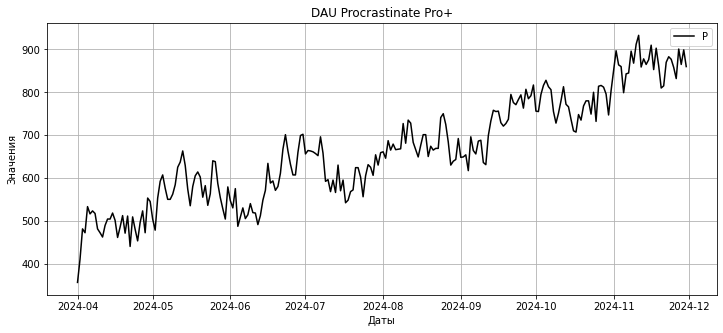

In [86]:
# строим график в matplotlib
plt.subplots(figsize=(12,5))
plt.plot(dau_app['session_date'], dau_app['user_id'], color='black')
plt.title('DAU Procrastinate Pro+')
plt.legend('Procrastinate-Pro+')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

In [87]:
display(mau_app)

,month,user_id
0,2024-04-01,9069
1,2024-05-01,10849
2,2024-06-01,10240
3,2024-07-01,10864
4,2024-08-01,11977
5,2024-09-01,12089
6,2024-10-01,13036
7,2024-11-01,14097


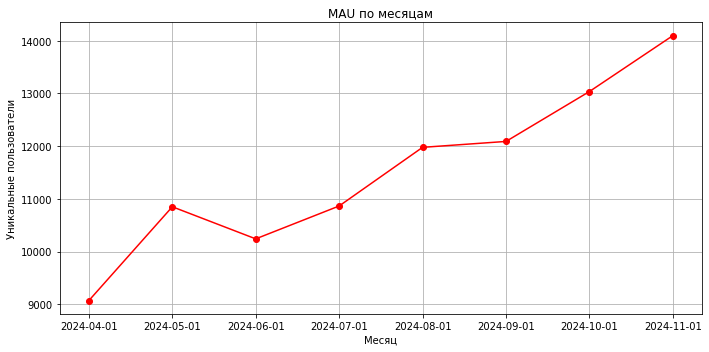

In [88]:
# Построение графика MAU
plt.figure(figsize=(10, 5))
plt.plot(mau_app['month'].astype(str), mau_app['user_id'],  marker='o', color='red')
plt.title('MAU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Уникальные пользователи')
plt.grid(True)
plt.tight_layout()
plt.show()

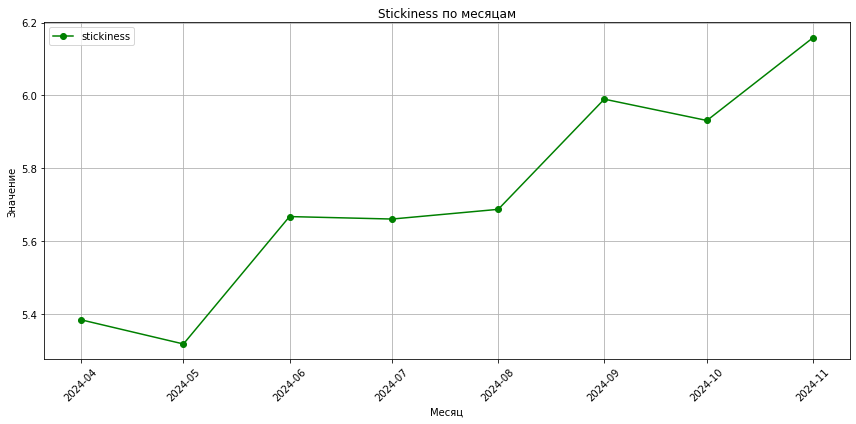

In [89]:
# Построение графика Stickiness
plt.figure(figsize=(12, 6))
plt.plot(stickiness_table_app['month'], stickiness_table_app['stick'], marker='o', color='green', label='stickiness')
plt.title('Stickiness по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**DAU**: по приложению стартует с 450+ пользователей ежедневно и заканчивается в райне 900 <br>
**MAU**: растет с 9 000 пользователей и заканчивает на 14 000 ежемесячно <br>
**Stickness**: растет с 5,4 до 6,2 что говорит о том что у нас становится все больше пользователей, <br> 
которые являются постоянными пользователями нашего приложения<br> <br> 

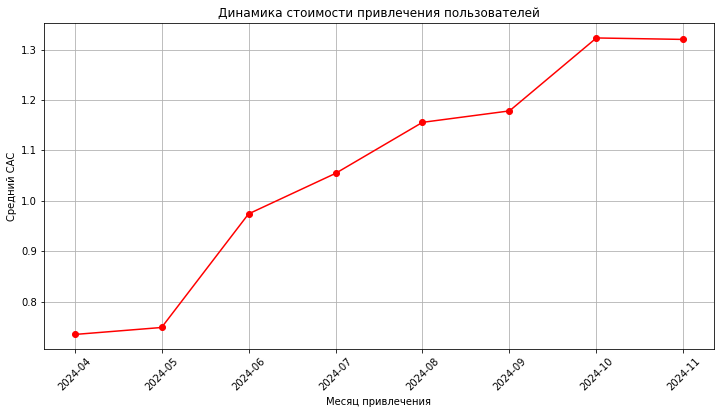

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(cac_per_month['month'].astype(str), cac_per_month['cac'], marker='o', color='red', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Месяц привлечения')
plt.ylabel('Средний CAC')
plt.title('Динамика стоимости привлечения пользователей')
plt.grid()
plt.show()

# Вычислим LTV и ROI за последние 28 дней

In [92]:
# Приведение дат к нужному формату
df_order['first_dt'] = pd.to_datetime(df_order['first_dt'], errors='coerce')
df_order['event_dt'] = pd.to_datetime(df_order['event_dt'], errors='coerce')

# Вычисляем lifetime
df_order['lifetime'] = (df_order['event_dt'] - df_order['first_dt']).dt.days

# Отсеиваем заказы после 28 дней
orders_28d = df_order[df_order['lifetime'] < 28].copy()

# Добавляем cohort_month
orders_28d['cohort_month'] = orders_28d['first_dt'].dt.to_period('M')

In [93]:
# Размер когорты и затраты (CAC)
cohort_period = (
    profiles
    .assign(cohort_month=profiles['first_dt'].dt.to_period('M'))
    .groupby('cohort_month')
    .agg(
        cohort_size=('user_id', 'nunique'),
        costs=('cac', 'sum')
    )
    .reset_index()
)

# Доход за 28 дней
revenue_period = (
    orders_28d
    .groupby('cohort_month')
    .agg(revenue=('revenue', 'sum'))
    .reset_index()
)

# Объединяем данные
ltv_roi = (
    cohort_period
    .merge(revenue_period, on='cohort_month', how='left')
    .fillna({'revenue': 0})
    .assign(
        ltv_28days=lambda x: x['revenue'] / x['cohort_size'],
        cac=lambda x: x['costs'] / x['cohort_size'],
        roi_28days=lambda x: (x['revenue'] - x['costs']) / x['costs']
    )
)

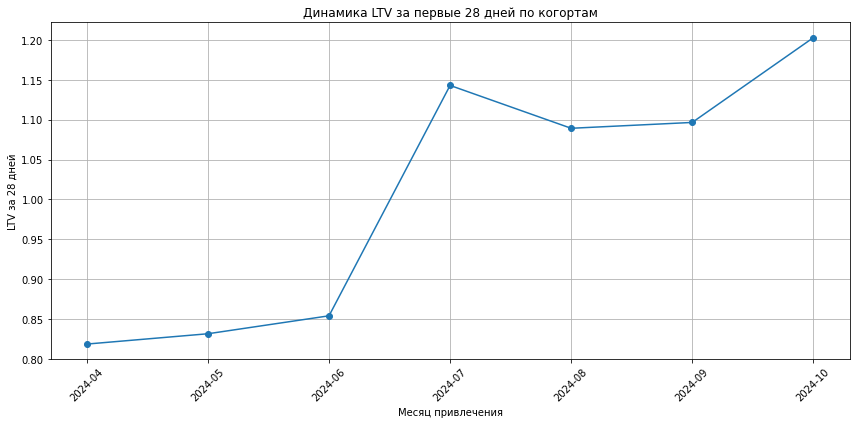

In [94]:
#Построим график LTV  
# Находим последний полный месяц (исключаем самый последний)
ltv_roi_filtered = ltv_roi[ltv_roi['cohort_month'] < ltv_roi['cohort_month'].max()]
plt.figure(figsize=(12, 6))
plt.plot(
    ltv_roi_filtered['cohort_month'].astype(str),
    ltv_roi_filtered['ltv_28days'],
    marker='o')
plt.xlabel('Месяц привлечения')
plt.ylabel('LTV за 28 дней')
plt.title('Динамика LTV за первые 28 дней по когортам')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

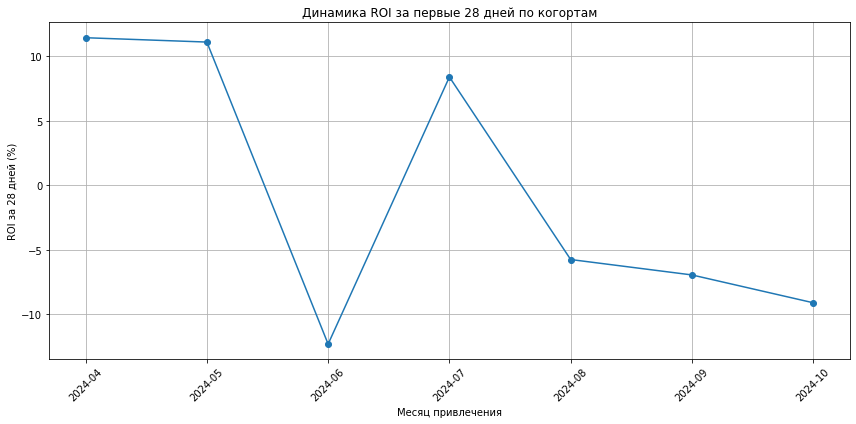

In [95]:
plt.figure(figsize=(12, 6))
roi_plot_data = ltv_roi[ltv_roi['cohort_month'] < ltv_roi['cohort_month'].max()]
plt.plot(
    roi_plot_data['cohort_month'].astype(str),
    roi_plot_data['roi_28days'] * 100,  # ROI часто отображается в процентах
    marker='o',
    linestyle='-'
)

plt.xlabel('Месяц привлечения')
plt.ylabel('ROI за 28 дней (%)')
plt.title('Динамика ROI за первые 28 дней по когортам')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Промежуточные выводы

**Динамика CAC**: На протяжении всей деятельносити приложения растет стоимость привлечения.<br> 
**Динамика LTV**: На протяжении всей деятельности приложения за исключением последнего месяца растет доходы от пользователей<br> **Динамика ROI**: ROI падает на протяжении всего времени использования приложения. 

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


In [96]:
dau = df_visit.groupby(['session_date', 'first_channel'])['user_id'].nunique().reset_index()

dau['date'] = pd.to_datetime(dau['session_date'])
dau['month'] = dau['session_date'].dt.to_period('M').dt.to_timestamp()

dau_monthly_average = dau.groupby(['month', 'first_channel'])['user_id'].mean().reset_index()

mau = df_visit.groupby(['month', 'first_channel'])['user_id'].nunique().reset_index()

stickiness_table = pd.merge(mau, dau_monthly_average, on=['month', 'first_channel'], how='left').fillna(0)
stickiness_table['stick']=100*(stickiness_table['user_id_y']/stickiness_table['user_id_x'])

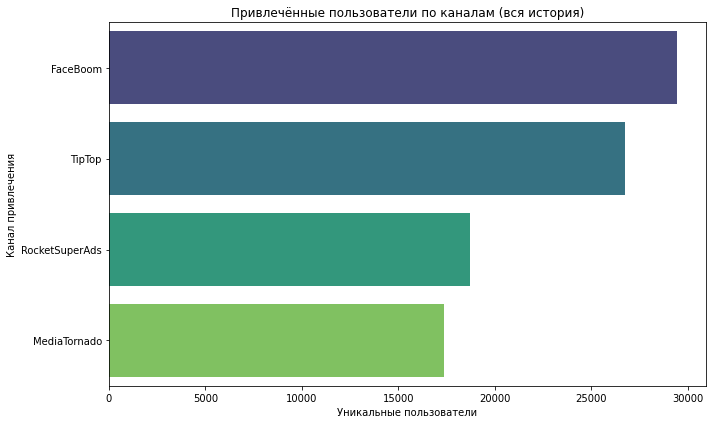

In [97]:
chan_counts = (
    mau.groupby('first_channel')['user_id']
       .sum()                       # уникальные пользователи
       .sort_values(ascending=False)    # удобнее читать с &laquo;топа&raquo;
)

# --- 3.  визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x=chan_counts.values,
    y=chan_counts.index,
    orient='h',
    palette='viridis'                   # разные цвета столбиков
)

plt.title('Привлечённые пользователи по каналам (вся история)')
plt.xlabel('Уникальные пользователи')
plt.ylabel('Канал привлечения')
plt.tight_layout()
plt.show()

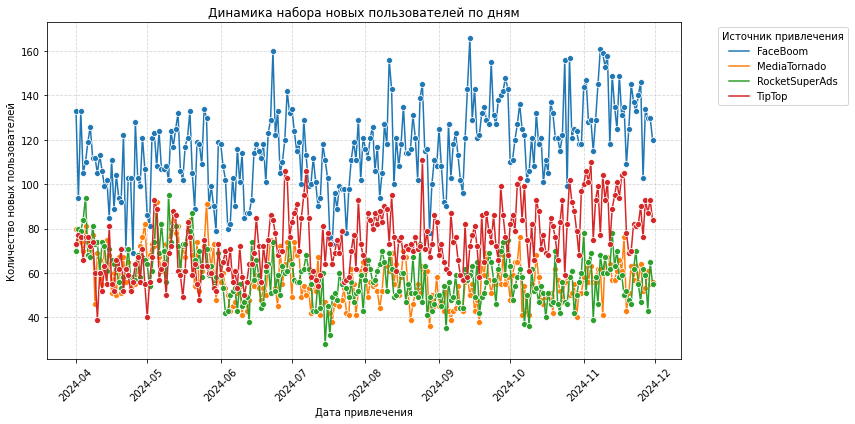

In [98]:
# Преобразуем first_dt в datetime, если это ещё не сделано
df_visit['first_dt'] = pd.to_datetime(df_visit['first_dt'])

# Сохраняем дату без времени
df_visit['day'] = df_visit['first_dt'].dt.floor('D')

# Группируем и переименовываем столбец
daily_users = df_visit.groupby(['day', 'first_channel'])['user_id'].nunique().reset_index(name='new_users')

# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_users, x='day', y='new_users', hue='first_channel', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Дата привлечения')
plt.ylabel('Количество новых пользователей')
plt.title('Динамика набора новых пользователей по дням')

plt.legend(title='Источник привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


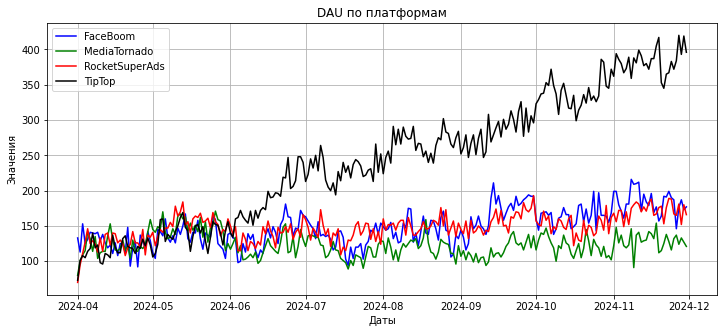

In [99]:
# строим график в matplotlib
plt.subplots(figsize=(12,5))
plt.plot(dau[dau['first_channel'] == 'FaceBoom']['date'], dau[dau['first_channel'] == 'FaceBoom']['user_id'], color='blue')
plt.plot(dau[dau['first_channel'] == 'MediaTornado']['date'], dau[dau['first_channel'] == 'MediaTornado']['user_id'], color='green')
plt.plot(dau[dau['first_channel'] == 'RocketSuperAds']['date'], dau[dau['first_channel'] == 'RocketSuperAds']['user_id'], color='red')
plt.plot(dau[dau['first_channel'] == 'TipTop']['date'], dau[dau['first_channel'] == 'TipTop']['user_id'], color='black')
plt.title('DAU по платформам')
plt.legend(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop'])
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

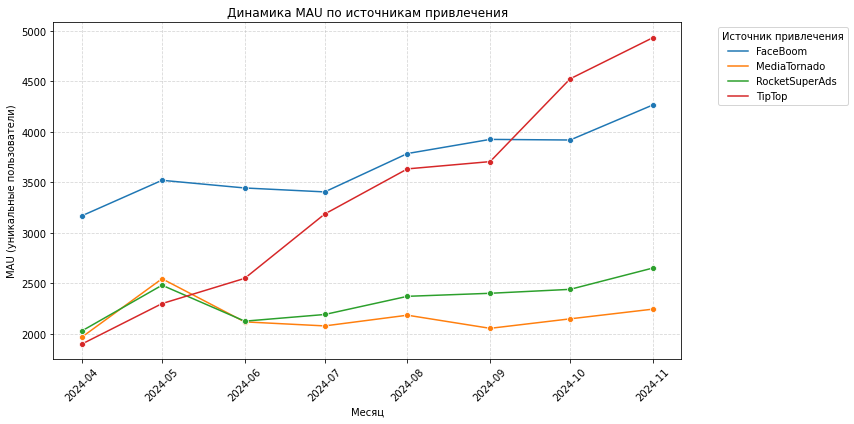

In [100]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=mau, x='month', y='user_id', hue='first_channel', marker='o')

plt.xlabel('Месяц')
plt.ylabel('MAU (уникальные пользователи)')
plt.title('Динамика MAU по источникам привлечения')
plt.xticks(rotation=45)
plt.legend(title='Источник привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

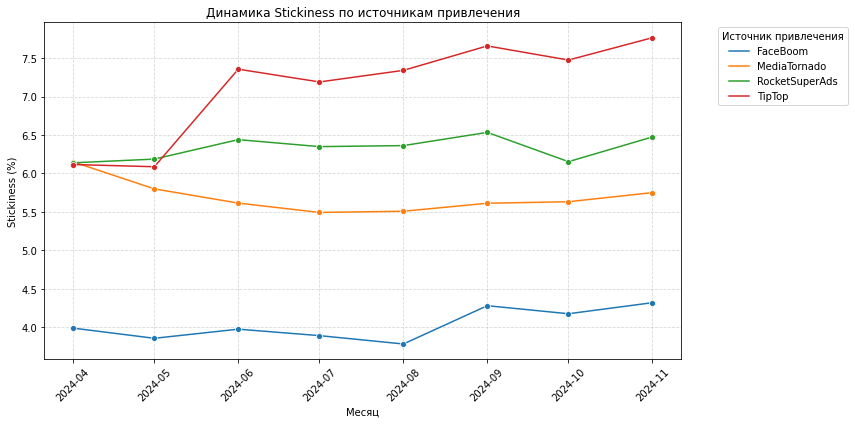

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=stickiness_table, x='month', y='stick', hue='first_channel', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Stickiness (%)')
plt.title('Динамика Stickiness по источникам привлечения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Источник привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [102]:
# Преобразуем даты
df_visit['first_dt'] = pd.to_datetime(df_visit['first_dt'])
df_visit['session_start'] = pd.to_datetime(df_visit['session_start'])

# Добавляем когортную неделю
df_visit['cohort_week'] = df_visit['first_dt'].dt.to_period('W')

# Рассчитываем дни с момента привлечения
df_visit['days_since_acquisition'] = (df_visit['session_start'] - df_visit['first_dt']).dt.days

# Фильтруем пользователей, активных в период 14–28 дней
active_14_28 = df_visit[(df_visit['days_since_acquisition'] >= 14) & (df_visit['days_since_acquisition'] < 28)]

users_acquired = df_visit.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='users_acquired')
users_active_14_28 = active_14_28.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='users_active_14_28')

# Объединяем и рассчитываем скользящее удержание
retention_rolling = users_active_14_28.merge(users_acquired, on=['cohort_week', 'first_channel'], how='left')
retention_rolling['Retention_14_28d'] = (retention_rolling['users_active_14_28'] / retention_rolling['users_acquired']) * 100
retention_rolling.tail(10)

,cohort_week,first_channel,users_active_14_28,users_acquired,Retention_14_28d
122,2024-10-28/2024-11-03,RocketSuperAds,40,402,9.950249
123,2024-10-28/2024-11-03,TipTop,172,639,26.917058
124,2024-11-04/2024-11-10,FaceBoom,9,991,0.908174
125,2024-11-04/2024-11-10,MediaTornado,36,407,8.845209
126,2024-11-04/2024-11-10,RocketSuperAds,40,407,9.828010
127,2024-11-04/2024-11-10,TipTop,156,651,23.963134
128,2024-11-11/2024-11-17,FaceBoom,1,965,0.103627
129,2024-11-11/2024-11-17,MediaTornado,18,433,4.157044
130,2024-11-11/2024-11-17,RocketSuperAds,18,450,4.000000
131,2024-11-11/2024-11-17,TipTop,56,657,8.523592


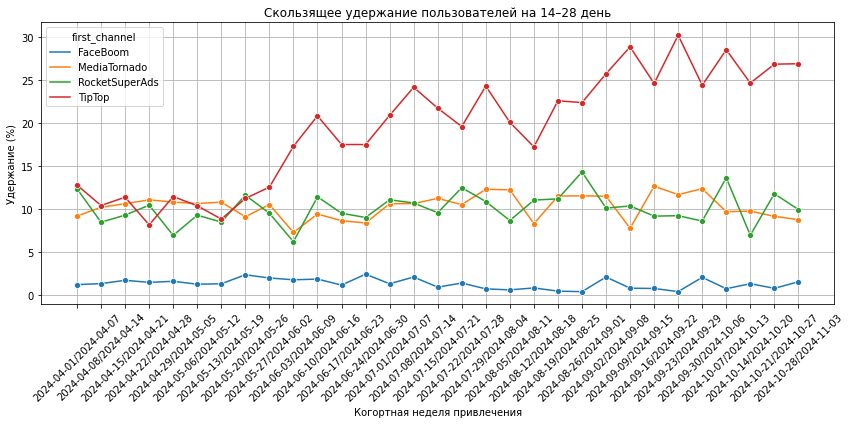

In [103]:
# Приведем когортную неделю к строковому виду для отображения на оси X
retention_rolling['cohort_week'] = retention_rolling['cohort_week'].astype(str)
cohort_not_take=['2024-11-04/2024-11-10', '2024-11-11/2024-11-17']
# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=retention_rolling[~retention_rolling.cohort_week.isin(cohort_not_take)], x='cohort_week', y='Retention_14_28d', hue='first_channel', marker='o')

plt.title('Скользящее удержание пользователей на 14–28 день')
plt.xlabel('Когортная неделя привлечения')
plt.ylabel('Удержание (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Промежуточные выводы**: <br>
**Faceboom**: скользящее удержание на низком уровне ниже 5%, что говорит о том что в качестве <br> 
длительного удержания не перспективный <br>
**MediaTornado**: Канал среднего уровня от 9% до 13% относительно стабильный без ярко выраженных спадов и падений<br>
**RocketSuperAds**: Удержание варьируется, какой-то определенной динамики не наблюдается. <br>
**TipTop**: Канал, который привлекает наибольшее количество подписчиков, пользователи этого канала наиболее вовлечены. <br> 

In [104]:
#Преобразование дат
df_order['first_dt'] = pd.to_datetime(df_order['first_dt'], errors='coerce')
df_order['event_dt'] = pd.to_datetime(df_order['event_dt'], errors='coerce')

# Удаляем строки с отсутствующей датой привлечения
df_order = df_order.dropna(subset=['first_dt'])

# Считаем lifetime
df_order['days_since_acquisition'] = (df_order['event_dt'] - df_order['first_dt']).dt.days

# Ограничиваем покупки в пределах 28 дней
orders_28d = df_order[df_order['days_since_acquisition'] < 28].copy()

# Формируем когортную неделю
orders_28d['cohort_week'] = orders_28d['first_dt'].dt.to_period('W')

# Уникальные пользователи с покупками за 28 дней
buyers_28d = orders_28d.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='buyers_28d')

# Размер когорты
cohort_sizes = (
    df_order[['user_id', 'first_dt', 'first_channel']]
    .drop_duplicates()
    .assign(cohort_week=lambda x: x['first_dt'].dt.to_period('W'))
    .groupby(['cohort_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='cohort_size')
)

# Объединяем и считаем конверсию
conversion = buyers_28d.merge(cohort_sizes, on=['cohort_week', 'first_channel'])
conversion['conversion_28d'] = (conversion['buyers_28d'] / conversion['cohort_size']) * 100

# Преобразуем формат недели для графика
conversion['cohort_week'] = conversion['cohort_week'].astype(str).str.replace('W', ' Неделя ')

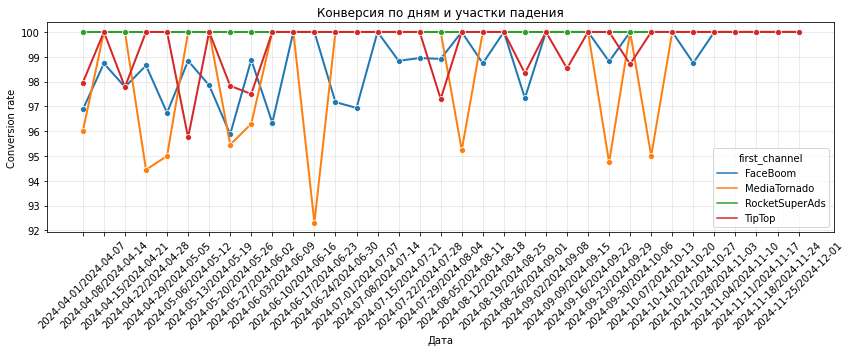

In [105]:
#Конверсия в покупку
plt.figure(figsize=(12, 5))
sns.lineplot(data=conversion, x="cohort_week", y="conversion_28d", hue="first_channel", marker='o', linewidth=2)

plt.title('Конверсия по дням и участки падения')
plt.xlabel('Дата'); 
plt.xticks(rotation=45)
plt.ylabel('Conversion rate')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  # 0–1 &rarr; %
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()

**FaceBoom** — высокая, но нестабильная конверсия высоком уровне 96–100%, но присутствуют периодические просадки, <br> 
почти всегда в топ-2, что говорит о качественной аудитории. <br>

**MediaTornado** — конверсия варьируется больше 90%, причём регулярно проседает до минимума среди всех каналов, отсутствие <br> устойчивого роста. Это говорит о нестабильном качестве трафика или неравномерную работу рекламных кампаний. <br>

**RocketSuperAds** — стабильная конверсия держится ровно на уровне 100% на всём отрезке. <br>
Канал узкоспециализированный, либо привлекает только тех, кто с высокой вероятностью покупает. <br>

**TipTop** — достаточно стабильный, но есть колебания. <br>
Почти всё время на уровне 100%, но в отдельных неделях падает до 97–98%.<br>

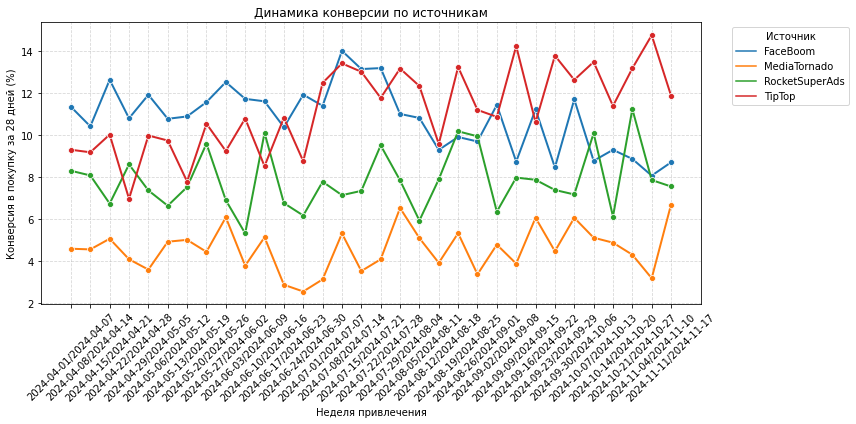

In [106]:
# Преобразуем даты
df_order['first_dt'] = pd.to_datetime(df_order['first_dt'], errors='coerce')
df_order['event_dt'] = pd.to_datetime(df_order['event_dt'], errors='coerce')

# Удаляем строки с отсутствующей датой привлечения
df_order = df_order.dropna(subset=['first_dt'])

# Считаем lifetime
df_order['days_since_acquisition'] = (df_order['event_dt'] - df_order['first_dt']).dt.days

# Ограничиваем покупки в пределах 28 дней
orders_28days = df_order[df_order['days_since_acquisition'] < 28].copy()

# Формируем когортную неделю
orders_28days['cohort_week'] = orders_28days['first_dt'].dt.to_period('W')

# Уникальные пользователи с покупками за 28 дней
buyers_28days = orders_28days.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='buyers_28days')


# !!!! Вот тут нужно считать в разрезе всех привлеченных пользователей
# Размер когорты 
cohort_sizes = (
    df_visit[['user_id', 'first_dt', 'first_channel']]
    .drop_duplicates()
    .assign(cohort_week=lambda x: x['first_dt'].dt.to_period('W'))
    .groupby(['cohort_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='cohort_size')
)

# Объединяем и считаем конверсию
conversion = buyers_28days.merge(cohort_sizes, on=['cohort_week', 'first_channel'])
conversion['conversion_28days'] = (conversion['buyers_28days'] / conversion['cohort_size']) * 100

# Преобразуем формат недели для графика
conversion['cohort_week'] = conversion['cohort_week'].astype(str).str.replace('W', ' Неделя ')
cohort_not_take=['2024-10-28/2024-11-03', '2024-11-18/2024-11-24', '2024-11-25/2024-12-01']
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=conversion[~conversion['cohort_week'].isin(cohort_not_take)],
    x="cohort_week",
    y="conversion_28days",
    hue="first_channel",
    marker="o",
    linewidth=2,
    palette='tab10'
)

plt.xticks(rotation=45)
plt.xlabel("Неделя привлечения")
plt.ylabel("Конверсия в покупку за 28 дней (%)")
plt.title("Динамика конверсии по источникам")
plt.legend(title="Источник", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

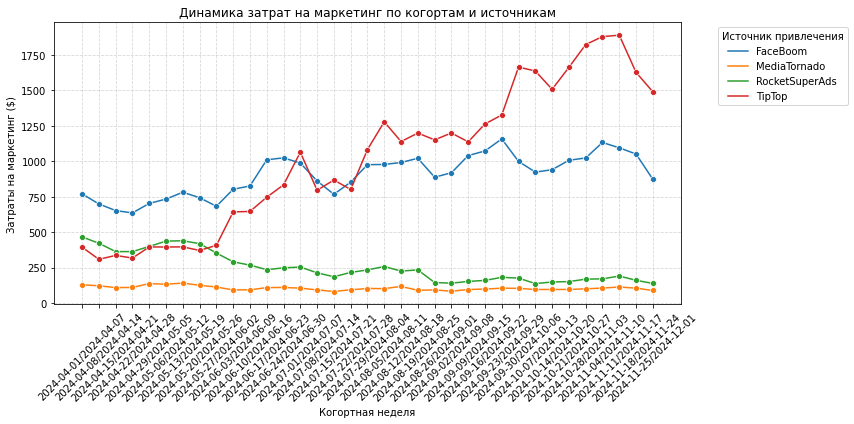

In [107]:
# Преобразуем dt в datetime
df_cost['dt'] = pd.to_datetime(df_cost['dt'], errors='coerce')

# Формируем когортную неделю
df_cost['cohort_week'] = df_cost['dt'].dt.to_period('W')

# Группируем маркетинговые расходы по когортной неделе и источнику
marketing_spend_weekly = df_cost.groupby(['cohort_week', 'channel'])['costs'].sum().reset_index()

# Заполняем пропущенные значения
marketing_spend_weekly['costs'] = marketing_spend_weekly['costs'].fillna(0)

# Преобразуем cohort_week в строку для удобства визуализации
marketing_spend_weekly['cohort_week'] = marketing_spend_weekly['cohort_week'].astype(str).str.replace('W', ' Неделя ')

# Визуализация динамики затрат
plt.figure(figsize=(12, 6))
sns.lineplot(data=marketing_spend_weekly, x='cohort_week', y='costs', hue='channel', marker='o')

plt.title('Динамика затрат на маркетинг по когортам и источникам')
plt.xlabel('Когортная неделя')
plt.ylabel('Затраты на маркетинг ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Источник привлечения", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

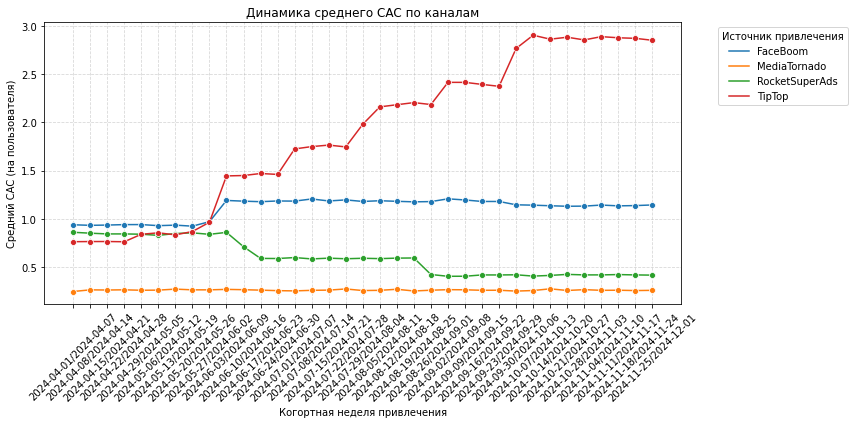

In [108]:
# Преобразуем даты
df_visit['first_dt'] = pd.to_datetime(df_visit['first_dt'], errors='coerce')
df_cost['dt'] = pd.to_datetime(df_cost['dt'], errors='coerce')

# Добавляем когортную неделю
df_visit['cohort_week'] = df_visit['first_dt'].dt.to_period('W')
df_cost['cohort_week'] = df_cost['dt'].dt.to_period('W')

# Считаем количество уникальных пользователей по когортам и каналам
users_per_channel_week = (
    df_visit
    .groupby(['cohort_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='users_acquired')
)

# Суммарные затраты по каналам и неделям
costs_per_channel_week = (
    df_cost
    .groupby(['cohort_week', 'channel'])['costs']
    .sum()
    .reset_index()
)

# Объединяем и считаем средний CAC
cac_weekly = costs_per_channel_week.merge(
    users_per_channel_week,
    left_on=['cohort_week', 'channel'],
    right_on=['cohort_week', 'first_channel'],
    how='left'
)

cac_weekly['users_acquired'] = cac_weekly['users_acquired'].fillna(0)
cac_weekly = cac_weekly[cac_weekly['users_acquired'] > 0]  # исключаем деление на 0

cac_weekly['avg_CAC'] = cac_weekly['costs'] / cac_weekly['users_acquired']

# Форматируем неделю
cac_weekly['cohort_week'] = cac_weekly['cohort_week'].astype(str).str.replace('W', ' Неделя ')

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cac_weekly,
    x='cohort_week',
    y='avg_CAC',
    hue='channel',
    marker='o'
)

plt.title('Динамика среднего CAC по каналам')
plt.xlabel('Когортная неделя привлечения')
plt.ylabel('Средний CAC (на пользователя)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Источник привлечения", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**TipTop**: Галопирующий рост CAC начиная с 0.75-1.45 доллара, затем стабильный подъём до 2.9 к ноябрю. <br>
Высокий CAC требует LTV на уровне больше $3, иначе возможен убыток по этому каналу.<br>

**FaceBoom**: Стабильный высокий CAC — находится в интервале $1.1–1.2 большую часть периода, при этом<br> 
отсутствуют резкие всплески или падения.<br>

**RocketSuperAds** Характеризуется устойчивым снижением CAC: с 0.9 до 0.35 доллара в период с мая по август, <br> 
после этого удержание на этом низком уровне. Возможно наиболее эффективный канал по соотношению затрат и выручки.<br>

**MediaTornado** Самый низкий CAC на всём горизонте: в пределах $0.2–0.25, с незначительными флуктуациями.<br>

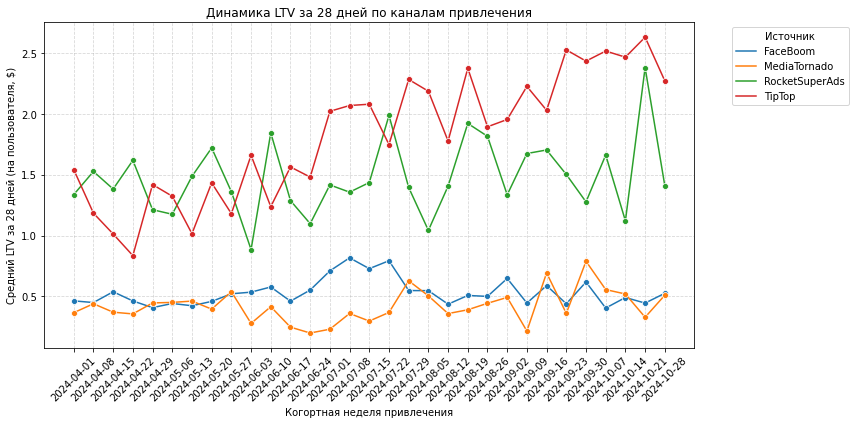

In [109]:
# Фильтруем заказы в пределах первых 28 дней и по дате first_dt
orders_28days = df_order.query('lifetime < 28 and first_dt < "2025-11-01"').copy()
orders_28days['cohort_week'] = orders_28days['first_dt'].dt.to_period('W').dt.to_timestamp()

# Считаем суммарную выручку по когортам
revenue_by_cohort = (
    orders_28days
    .groupby(['cohort_week', 'first_channel'])['revenue']
    .sum()
    .reset_index()
)

# Считаем размер когорты (все привлечённые пользователи)
profiles['first_dt'] = pd.to_datetime(profiles['first_dt'], errors='coerce')
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.to_timestamp()

cohort_sizes = (
    profiles
    .groupby(['cohort_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='cohort_size')
)

# Объединяем и считаем LTV
ltv_data = revenue_by_cohort.merge(cohort_sizes, on=['cohort_week', 'first_channel'], how='left')
ltv_data['ltv_28days'] = ltv_data['revenue'] / ltv_data['cohort_size']

# Форматируем неделю для графика
ltv_data['cohort_week'] = ltv_data['cohort_week'].dt.strftime('%Y-%m-%d')
cohort_not_take=['2024-11-04', '2024-11-11', '2024-11-18', '2024-11-25']
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ltv_data[~ltv_data['cohort_week'].isin(cohort_not_take)],
    x='cohort_week',
    y='ltv_28days',
    hue='first_channel',
    marker='o'
)

plt.title('Динамика LTV за 28 дней по каналам привлечения')
plt.xlabel('Когортная неделя привлечения')
plt.ylabel('Средний LTV за 28 дней (на пользователя, $)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Источник', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**TipTop** Лидер по среднему LTV: от 1.0 до 2.7, с пиками выше 2.6 в октябре. <br>
Характеризуется восходящей динамикой вплоть до ноября, затем — плавный спад. <br>

**MediaTornado** Самый низкий LTV среди всех каналов: от 0.2 до ~0.55, с нерегулярными колебаниями. <br>
Одни недели — высокий результат, другие — резкое падение. <br>

**FaceBoom** Умеренная динамика, LTV держится в диапазоне 0.4–0.7, в основном без выраженных скачков. <br>
Канал стабилен, но ценность одного пользователя невысока. <br>

**RocketSuperAds** Показывает LTV в диапазоне 1.2–2.4, с отдельными пиками выше 2.5. <br>
Есть небольшая волатильность, но в целом — стабильный и высокий результат. <br>


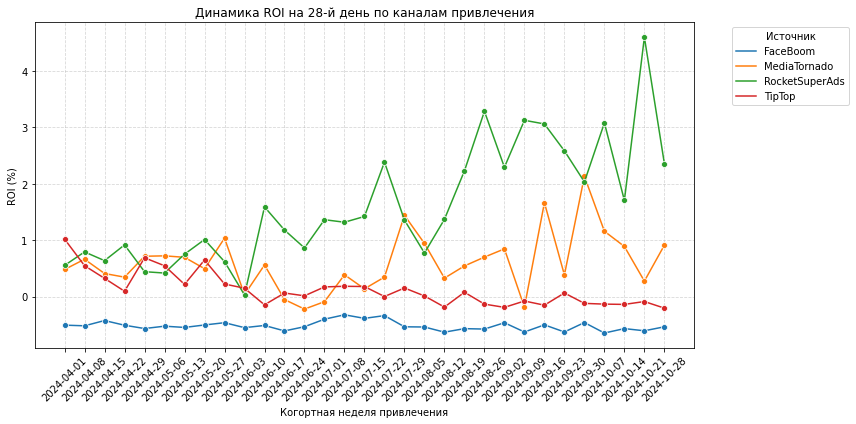

In [110]:
# Отфильтруем покупки только за первые 28 дней
orders_28days = df_order.query('lifetime < 28 and first_dt < "2025-11-01"').copy()
orders_28days['cohort_week'] = orders_28days['first_dt'].dt.to_period('W').dt.to_timestamp()

# Суммарная выручка по когортам и каналам
revenue_by_cohort = (
    orders_28days.groupby(['cohort_week', 'first_channel'])['revenue']
    .sum()
    .reset_index()
)

# Размер когорты (уникальные пользователи)
profiles['first_dt'] = pd.to_datetime(profiles['first_dt'], errors='coerce')
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.to_timestamp()

cohort_sizes = (
    profiles.groupby(['cohort_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='cohort_size')
)

# Суммарные маркетинговые затраты по каналам и неделям
df_cost['cohort_week'] = df_cost['dt'].dt.to_period('W').dt.to_timestamp()
costs_by_channel = (
    df_cost.groupby(['cohort_week', 'channel'])['costs']
    .sum()
    .reset_index()
    .rename(columns={'channel': 'first_channel', 'costs': 'total_costs'})
)

# Объединяем все части
roi_data = (
    revenue_by_cohort
    .merge(cohort_sizes, on=['cohort_week', 'first_channel'], how='left')
    .merge(costs_by_channel, on=['cohort_week', 'first_channel'], how='left')
)

# Заполняем пропуски нулями, чтобы избежать NaN в расчетах
roi_data[['cohort_size', 'total_costs']] = roi_data[['cohort_size', 'total_costs']].fillna(0)
roi_data = roi_data[roi_data['cohort_size'] > 0]

# Расчёт метрик
roi_data['LTV_28d'] = roi_data['revenue'] / roi_data['cohort_size']
roi_data['CAC'] = roi_data['total_costs'] / roi_data['cohort_size']
roi_data['ROI_28d'] = (roi_data['LTV_28d'] - roi_data['CAC']) / roi_data['CAC'] * 1

# Форматируем недели
roi_data['cohort_week'] = roi_data['cohort_week'].dt.strftime('%Y-%m-%d')
cohort_not_take=['2024-11-04', '2024-11-11', '2024-11-18', '2024-11-25']
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=roi_data[~roi_data['cohort_week'].isin(cohort_not_take)],
    x='cohort_week',
    y='ROI_28d',
    hue='first_channel',
    marker='o'
)

plt.title('Динамика ROI на 28-й день по каналам привлечения')
plt.xlabel('Когортная неделя привлечения')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Источник", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**RocketSuperAds** Лидер по ROI: с ростом выше 4, устойчиво держится выше 1,50–2,5 большую часть времени.
Причина — низкий CAC (~0.3–0.4) и стабильный высокий LTV (1.2–2.5). Является самым прибыльным и предсказуемым каналом.

**MediaTornado** ROI колеблется в диапазоне 0,50–1,7%, в среднем второй по эффективности канал.
Несмотря на низкий LTV (0.2–0.5), **низкий CAC (0.2)** делает канал рентабельным уже в первые 28 дней.

**FaceBoom** Худший ROI среди всех каналов, практически на всём интервале держится в отрицательной зоне (-0,6 до -0,4).
Характеризуется умеренным LTV (0.4–0.7) и относительно высоким CAC (~1.1–1.2), можно сделать вывод, что 
инвестиции не окупаются за 28 суток.

**TipTop** Несмотря на высокий LTV, ROI остаётся в диапазоне 0–0,5, но постепенно снижается.
Основной причиной является сильный рост CAC, особенно в летние месяцы, съедающий прибыль.

# Общие выводы по каналам

**TipTop** самая лучшая аудитория с высокой вовлечённостью, стабильной LTV, отличным удержание.
Несмотря на эти достоинства сильный рост затрат (CAC) бьет по финансовой эффективности. 
ROI снижается несмотря на хорошее поведение пользователей.
Необходимо сдерживать рост затрат, проводить анализ ROI.

**FaceBoom**
При стабильной конверсии канал остаётся наименее эффективным: ROI устойчиво отрицательный в связи с высоким CAC 
и слабым удержанием.Текущая модель не приносит окупаемости — трафик дорогой и быстро «сгорает».
Стоит задуматься об оптимизации канала.  

**RocketSuperAds** - канал с лучшими характеристиками: снижающийся CAC, стабильный LTV, растущий ROI до 400%+.
Несмотря на небольшие изменения в ранние периоды, сейчас — самый стабильно рентабельный источник.
Надо масштабировать при текущем контроле качества и затрат.

**MediaTornado**
Бюджетный и при этом эффективный канал — низкий CAC даёт ROI выше 100% уже в первые 28 дней.
ограниченное качество аудитории, слабое удержание и LTV → не масштабируется без потери рентабельности.
Можно использовать как не основной источник дохода.

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

In [111]:
df_order['order_week'] = pd.to_datetime(df_order['event_dt'], errors='coerce').dt.to_period('W').dt.to_timestamp()
df_order['first_week'] = pd.to_datetime(df_order['first_dt'], errors='coerce').dt.to_period('W').dt.to_timestamp()
df_order['N_week'] = ((df_order['order_week'] - df_order['first_week']).dt.days // 7).astype(int)
# 1. Рассчитать N_week — недельный лайфтайм
df_order['N_week'] = ((df_order['order_week'] - df_order['first_week']).dt.days // 7).astype(int)
#2. Сгруппировать по когорте, каналу и N-й неделе: LTV
ltv_by_week = (
    df_order
    .groupby(['first_week', 'first_channel', 'N_week'])['revenue']
    .sum()
    .reset_index()
)
#3. Добавить размер когорты (кол-во пользователей)
cohort_sizes = (
    profiles
    .assign(first_week=profiles['first_dt'].dt.to_period('W').dt.to_timestamp())
    .groupby(['first_week', 'first_channel'])['user_id']
    .nunique()
    .reset_index(name='cohort_size')
)

ltv_by_week = ltv_by_week.merge(cohort_sizes, on=['first_week', 'first_channel'], how='left')
ltv_by_week['ltv_cum'] = ltv_by_week['revenue'] / ltv_by_week['cohort_size']
#4. Посчитать накопительный LTV (cumsum)
ltv_by_week.sort_values(by=['first_week', 'first_channel', 'N_week'], inplace=True)
ltv_by_week['ltv_cum'] = ltv_by_week.groupby(['first_week', 'first_channel'])['ltv_cum'].cumsum()
#5. Добавить CAC
df_cost['cohort_week'] = pd.to_datetime(df_cost['dt'], errors='coerce').dt.to_period('W').dt.to_timestamp()

cac = (
    df_cost.groupby(['cohort_week', 'channel'])['costs']
    .sum()
    .reset_index()
    .rename(columns={'cohort_week': 'first_week', 'channel': 'first_channel'})
)

ltv_roi = ltv_by_week.merge(cac, on=['first_week', 'first_channel'], how='left')
ltv_roi['CAC'] = ltv_roi['costs'] / ltv_roi['cohort_size']
#6. Рассчитать ROI по неделям
ltv_roi['ROI'] = (ltv_roi['ltv_cum'] - ltv_roi['CAC']) / ltv_roi['CAC'] * 100

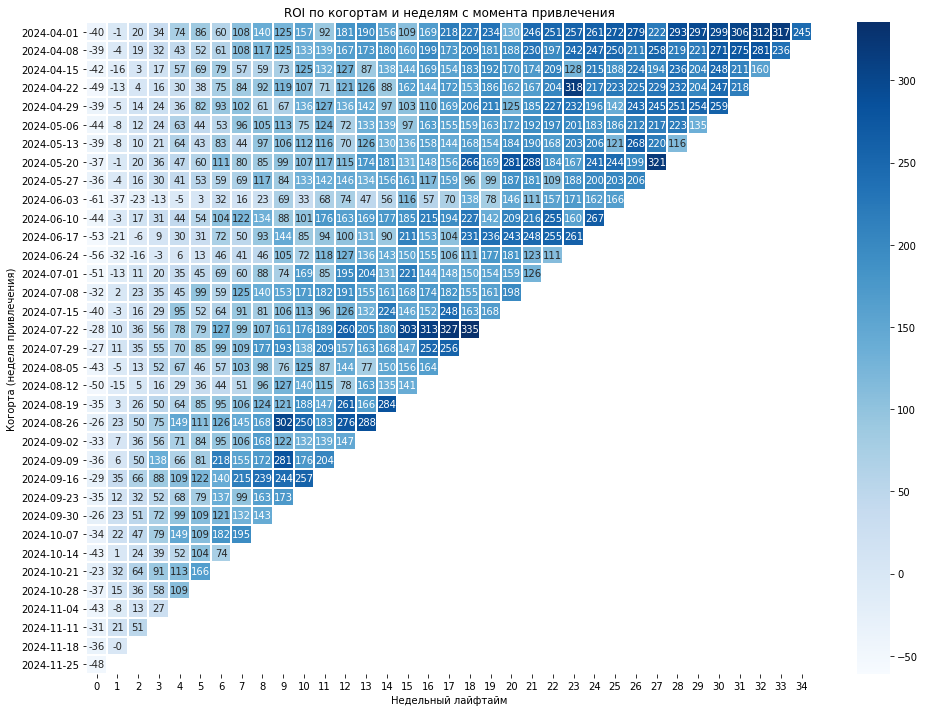

In [112]:
heatmap_data = ltv_roi.pivot_table(
    index='first_week',
    columns='N_week',
    values='ROI',
    aggfunc='mean'  # или max, если хочешь видеть пиковый ROI
)
# Преобразуем индекс к дате без времени
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# Строим тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", linewidths=1, annot_kws={"size": 10})

plt.title("ROI по когортам и неделям с момента привлечения")
plt.xlabel("Недельный лайфтайм")
plt.ylabel("Когорта (неделя привлечения)")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

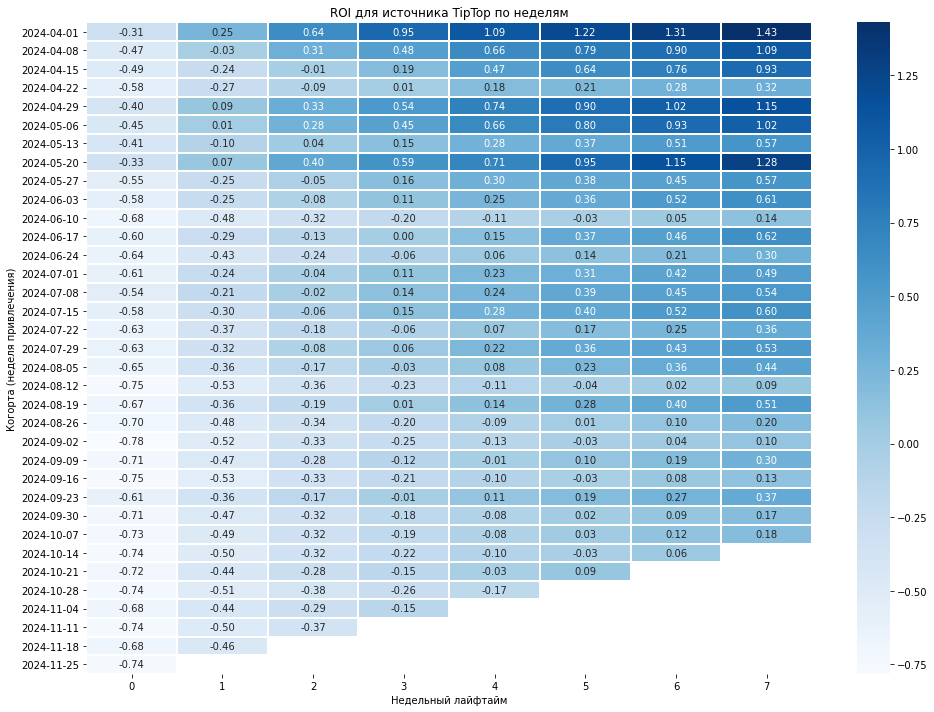

In [113]:
# Фильтруем по нужному источнику (например, TipTop)
roi_tiptop = ltv_roi[ltv_roi['first_channel'] == 'TipTop'].copy()

# Создаём таблицу: строки — неделя привлечения, столбцы — неделя жизни
roi_table = roi_tiptop.pivot_table(
    index='first_week',
    columns='N_week',
    values='ROI',
    aggfunc='mean'
)

# Преобразуем индекс в строку с датой (YYYY-MM-DD)
roi_table.index = roi_table.index.strftime('%Y-%m-%d')

plt.figure(figsize=(14, 10))
# ▸ делим каждую ячейку на 100
data = roi_table.iloc[:, :8] / 100

sns.heatmap(
    data,
    cmap='Blues',
    annot=True,
    fmt=".2f",                 # формат под новые масштабы (2 знака после запятой)
    linewidths=1,
    annot_kws={"size": 10}
)

plt.title("ROI для источника TipTop по неделям")
plt.xlabel("Недельный лайфтайм")
plt.ylabel("Когорта (неделя привлечения)")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Выводы** <br>
Общие наблюдения: <br>
Большинство когорт начинают с отрицательного ROI: <br>
Почти все когорты в первые 1–2 недели показывают ROI от –70% до –30%. <br>
Это объяснимо тем, что на старте пользователи не могут принести значимую выручку. <br>
Более ранние когорты (апрель–май 2024) выходят в плюс быстрее — начиная с 1–3 недели. <br>
Поздние когорты (август–ноябрь 2024) выходят на положительный ROI только к 6–9 неделе, <br>
а иногда не успевают выйти в плюс даже за 10 недель. <br>
Когорты с быстрой окупаемостью (ROI ≥ 0 к 2–3 неделе): <br>

**Интерпретация ROI для источника TipTop**

Видно также разделение на более ранние когорты, так в ранних когортах окупаемость приходит к 3 недели,<br> 
а в более поздних к 6, но к 8 неделе для всех когорт уже приходят на период окупаемости. <br>

Рекомендации: <br>

Следует сфокусироваться на каналах с ранней окупаемостью: поддерживать источники, <br> 
где ROI становится положительным в первые 3–4 недели. <br>
Каналы с длительным циклом — проаудировать: Если ROI < 0 даже к 8-й неделе — <br> 
стоит оптимизировать CAC, монетизацию или прекратить привлечение. <br>

## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


# Итоговый вывод: откуда берётся стагнация выручки <br>

Несмотря на всплеск интереса к приложению после запуска спортивного контента,<br>
денежные поступления растут слабее ожиданий, потому что:<br>

Новые пользователи не окупаются в первые 28 дней. <br>
Ключевое условие бизнес-модели нарушается: <br>
большинство новичков так и не возвращает вложенные в их привлечение средства.<br>
Показатели DAU и MAU растут вместе с CAC. <br> 
Особенно заметно удорожание канала TipTop, что увеличивает расходы быстрее, чем доходы.<br>
Метрики поведения улучшились, но недостаточно. <br> 
Вовлечённость, удержание и конверсии действительно поднялись, однако прирост не покрывает ускорившиеся маркетинговые траты.<br>

# Аудитория и каналы <br>

Каналы, что происходит итог для ROI <br>

**TipTop**	Приводит активных и лояльных пользователей, но после лета CAC вырос более чем втрое.	Канал перегрет, ROI уходит в минус.<br>

**RocketSuperAds**	Качество трафика растёт плавно; пользователи выходят «в ноль» на 9–10-й неделе.	Потенциал масштабирования есть.<br>

**MediaTornado**	Стабильный, недорогой, но объёмы невелики; LTV чуть ниже среднего.	Можно держать как «базовый» источник.<br>

**FaceBoom**	Массовый, но низкокачественный трафик: слабый retention и stickiness.	Убыточен при любой глубине закупки.<br>

**Вывод по каналам**: в текущих условиях целесообразно наращивать объёмы лишь в RocketSuperAds и частично в MediaTornado. <br>
TipTop требует паузы и пересмотра стоимости, а FaceBoom следует минимизировать или отключить.<br>

Ключевая причина стагнации — разрыв между ростом пользовательской базы и скоростью её монетизации. <br> 
Без улучшения раннего ROI (первые 28 дней) или снижения CAC дальнейшее увеличение трафика не принесёт ожидаемой выручки <br>

# Рекомендации для отдела маркетинга

Рассмотрим поканально.

1. Приостановить или существенно сократить закупку в FaceBoom
ROI стабильно –0,99 и ниже.
Самые слабые retention и stickiness среди всех каналов.
Данных о положительной динамике нет → дальнейшие вложения не оправданы.

2. Перезагрузить TipTop через сегментацию
До июля канал лидировал по ROI; затем CAC вырос в 4 раза.
Необходимо пересмотреть лимиты бюджета.
Эффективность можно восстановить, но при меньших вложениях.

3. Расширять RocketSuperAds
Канал устойчиво приближается к окупаемости.
Пользователи активны, LTV стабилен, CAC снижается.
Лучшая unit-экономика среди всех источников — приоритет на масштабирование.

4. Держать MediaTornado как «базовый» канал
Привлекает недорого, часть когорт окупается быстро.
Поддерживает низкую среднюю стоимость привлечения по портфелю каналов.

5. Контролировать ROI на недельной основе
Анализировать не только 28-дневное окно, но и окупаемость к 6–10-й неделе.
Критично для продуктов с более длинным жизненным циклом.



